### Задание по программированию: Градиентный бустинг над решающими деревьями

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss

import math

import matplotlib.pyplot as pplt
%matplotlib inline

#### 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма).

In [3]:
data = pd.read_csv('./gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


#### Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [9]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

#### 2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
- Преобразуйте полученное предсказание по формуле $$\frac{1}{1 + e^{-y_p}}$$, где y_p — предсказанное значение.
- Вычислите и постройте график значений log-loss на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [55]:
def sigmoid(y):
    return 1 / (1 + math.exp(-y))

def plot_loss(learning_rate, test_loss, train_loss):
    pplt.figure()
    pplt.plot(test_loss, 'r', linewidth = 2)
    pplt.plot(train_loss, 'b', linewidth = 2)
    pplt.legend(['test', 'train'])
    pplt.title('learning_rate = {}'.format(learning_rate))

def calculate_loss(model, X, y):
    loss = []
    for predictions in model.staged_decision_function(X):
        loss.append(log_loss(y, [sigmoid(pred_y) for pred_y in predictions]))
    return loss

In [63]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

train_loss_per_rate = {}
test_loss_per_rate = {}
for rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=rate)
    model.fit(X_train, y_train)
    train_loss_per_rate[rate] = calculate_loss(model, X_train, y_train)
    test_loss_per_rate[rate] = calculate_loss(model, X_test, y_test)
    

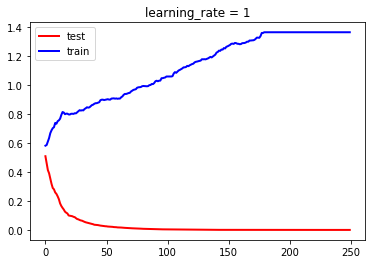

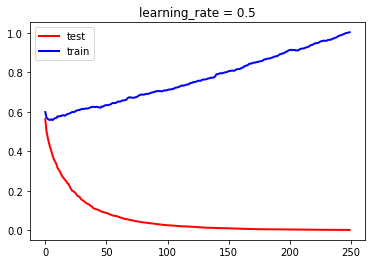

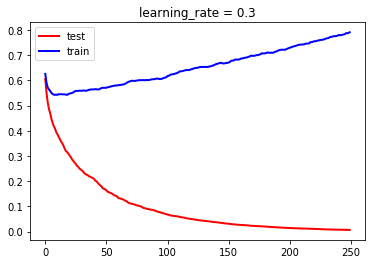

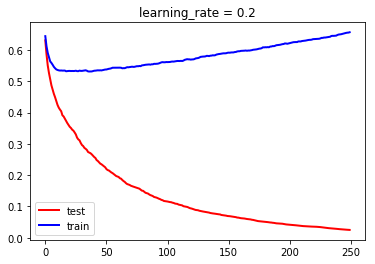

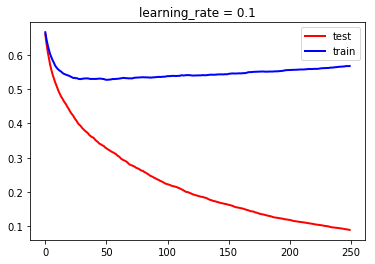

In [64]:
for rate in learning_rates:
    plot_loss(rate, train_loss_per_rate[rate], test_loss_per_rate[rate])

In [75]:
test_loss_df = pd.DataFrame(test_loss_per_rate)
test_loss_df.min()

0.1    0.526920
0.2    0.531095
0.3    0.542314
0.5    0.558203
1.0    0.582294
dtype: float64

In [74]:
test_loss_df.idxmin()

0.1    51
0.2    36
0.3    10
0.5     6
1.0     0
dtype: int64

#### 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [77]:
print('overfitting')

overfitting


#### 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2

In [82]:
test_loss_df[0.2].min()

0.531094637596885

In [84]:
test_loss_df[0.2].idxmin()

36

#### 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, random_state=241 и остальными параметрами по умолчанию.
#### Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [86]:
forest_classifier = RandomForestClassifier(n_estimators=36, random_state=241)
forest_classifier.fit(X_train, y_train)
predictions = forest_classifier.predict_proba(X_test)
forest_classifier_loss = log_loss(y_test, predictions)

forest_classifier_loss

0.5415685811957381